# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

Python-dotenv could not parse statement starting at line 11
Python-dotenv could not parse statement starting at line 12
Python-dotenv could not parse statement starting at line 13


True

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin", 
    language="en", 
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum", 
    language="en", 
    sort_by="relevancy"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

bitcoin_df = pd.DataFrame(bitcoin_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923
1,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922
2,2021-12-12,People aren't done hijacking major politicians...,0.5267,0.112,0.000,0.888
3,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858
4,2022-01-07,Between Bitcoin-themed superspreader events an...,-0.3716,0.000,0.074,0.926


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

ethereum_df = pd.DataFrame(ethereum_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.00,1.000
1,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.06,0.940
2,2021-12-10,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.00,0.881
3,2021-12-29,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,0.0000,0.000,0.00,1.000
4,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.00,1.000


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.168235,0.069450,0.028100,0.902450
std,0.337630,0.069828,0.040219,0.082494
min,-0.401900,0.000000,0.000000,0.740000
25%,0.000000,0.000000,0.000000,0.852250
50%,0.125000,0.078000,0.000000,0.906500
75%,0.411525,0.120000,0.074000,1.000000
max,0.790600,0.211000,0.111000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.276390,0.088200,0.010650,0.901100
std,0.393864,0.108128,0.027469,0.106049
min,-0.434000,0.000000,0.000000,0.640000
25%,0.000000,0.000000,0.000000,0.824500
50%,0.101150,0.040000,0.000000,0.918500
75%,0.567725,0.149500,0.000000,1.000000
max,0.946000,0.360000,0.102000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
btc_article = bitcoin_sentiments[0]['text']
eth_article = ethereum_sentiments[0]['text']

In [13]:
bitcoin_sentiments

[{'text': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency… [+1467 chars]',
  'date': '2021-12-29',
  'compound': 0.3612,
  'positive': 0.077,
  'negative': 0.0,
  'neutral': 0.923},
 {'text': "Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi's Twitter account was hacked with a message saying India ha… [+854 chars]",
  'date': '2021-12-12',
  'compound': -0.4019,
  'positive': 0.0,
  'negative': 0.078,
  'neutral': 0.922},
 {'text': "People aren't done hijacking major politicians' Twitter accounts for financial gain. TechCrunch reports an intruder temporarily seized control of Indian Prime Minister Narendra Modi's Twitter account… [+1087 chars]",
  'date': '2021-12-12',
  'compound': 0.5267,
  'positive': 0.112,
  'negative': 0.0,
  'neutral

In [15]:
btc_sent_token = sent_tokenize(btc_article)

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# def clean_text(article):
#     sw = set(stopwords.words('english'))
#     regex = re.compile("[^a-zA-Z ]")
#     re_clean = regex.sub('', article)
#     words = word_tokenize(re_clean)
#     output = [word.lower() for word in words if word.lower() not in sw]
#     return output

# Expand the default stopwords list if necessary
    
def clean_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = ['via', 'ha', 'chars', 'image', 'images','caption', 'getty', 'source', 'saying', 'afp']
    re_clean = regex.sub(' ', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    return output


In [17]:
# Complete the tokenizer function
def tokenizer(article):
    """Tokenizes text."""
    
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', article)
    
    # append all words for each article to the word_tokenized list
    word_tokenized = word_tokenize(re_clean)
    # Create a tokenized list of the words
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in word_tokenized]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]  

    return tokens

In [18]:
# Create a new tokens column for Bitcoin
# tokens = []

# for articles in bitcoin_sentiments[i]['text']:
#     tokens.append(tokenizer(bitcoin_sentiments[i]['text']))
#     i+=1
# btc_df["Tokens"] = tokens
    


NameError: name 'i' is not defined

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
def bigram_counter(article): 
    big_string = ''.join(article)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [21]:
# Generate the Bitcoin N-grams where N=2
bigram_counter(btc_article)

,bigram,count
0,"(musk, mark)",1
1,"(mark, ralston)",1
2,"(ralston, afp)",1
3,"(afp, via)",1
4,"(via, getty)",1
5,"(getty, images)",1
6,"(images, elon)",1
7,"(elon, musk)",1
8,"(musk, seems)",1
9,"(seems, agree)",1


In [22]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_article)

,bigram,count
0,"(white, castle)",2
1,"(castle, double)",1
2,"(double, cheeseburger)",1
3,"(cheeseburger, erin)",1
4,"(erin, mcdowell)",1
5,"(mcdowell, insider)",1
6,"(insider, list)",1
7,"(list, name)",1
8,"(name, brand)",1
9,"(brand, getting)",1


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_sent_token)

[('Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency… [+1467 chars]',
  1)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_article)

[(' ', 29), ('e', 20), ('t', 18)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
import spacy
nlp = spacy.load("en_core_web_sm")

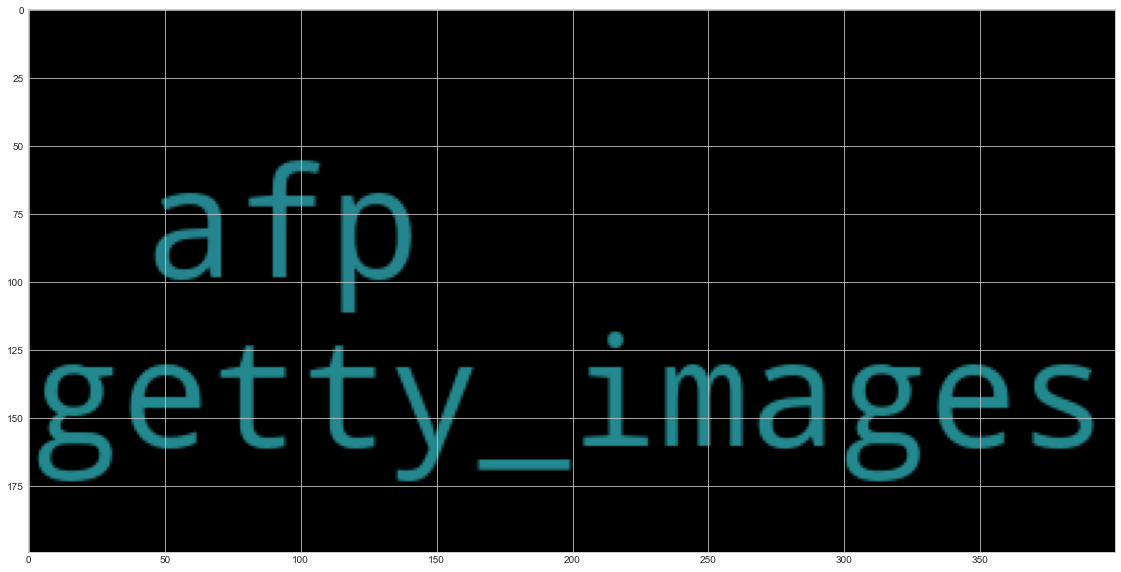

In [27]:
# Generate the Bitcoin word cloud
doc = nlp(btc_article)

entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
entities = [i.lower().replace(' ', '_') for i in entities]
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

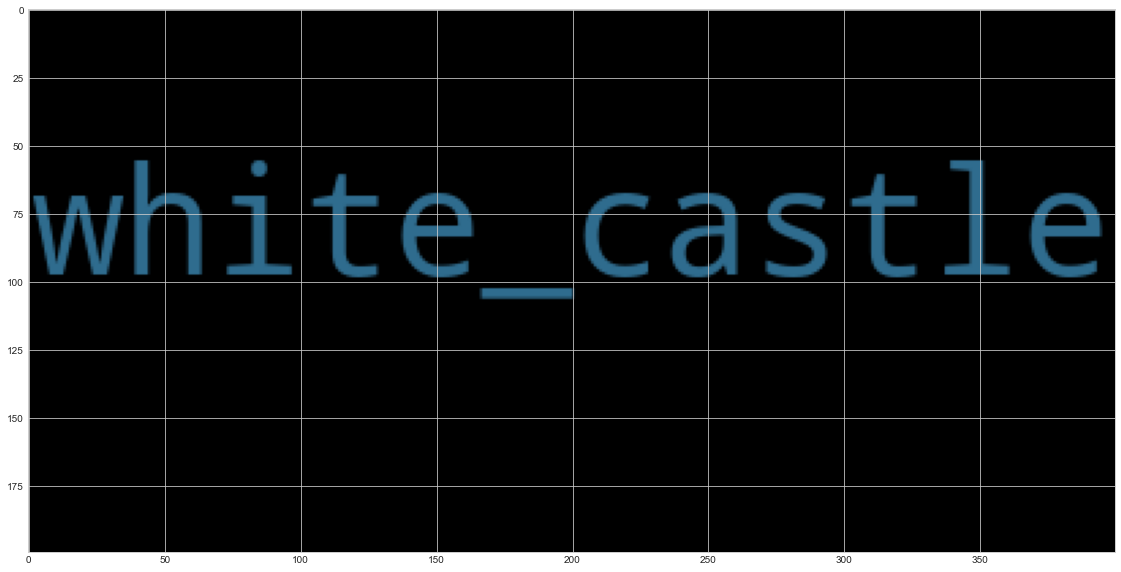

In [28]:
# Generate the Ethereum word cloud
doc = nlp(eth_article)

entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
entities = [i.lower().replace(' ', '_') for i in entities]
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [34]:
# Render the visualization
# YOUR CODE HERE!

In [35]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [38]:
# Render the visualization
# YOUR CODE HERE!

In [39]:
# List all Entities
# YOUR CODE HERE!

---